In [1]:
import sys, os, csv, argparse
import pandas as pd
sys.path.append('..')
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from utility import *

"""
TODO: Execture
"""
if __name__ == '__main__':
    num_data = 2000
    MAX_Iter = 1000 #20 itr/epoch
    BATCH_SIZE = 100
    
    num_func = 1
    num_model = 0
    
    exec('f = f%s' % num_func)
    exec('net = Net%s().cuda().double() ' % num_model)
    
    print("number of model parameters %d" % model_params(net))
    
    weight_save_file_name = 'func' + str(num_func) + '_model' + str(num_model) + '_weight.dat'
    
    loader = UtiData.DataLoader(dataset=make_feature(num_data, f), 
                                batch_size=BATCH_SIZE, 
                                shuffle=True, num_workers=1)
    
    #criterion = nn.MSELoss().cuda()
    criterion = nn.MSELoss().cuda()
    
    #optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.005)
    optimizer = torch.optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999), weight_decay=0.0000)
    
    loss_total = []
    all_params = np.array([])
    for iter in range(0,MAX_Iter):
        running_loss = 0.0
        optimizer.zero_grad()
        for step_i, (x_batch, y_batch) in enumerate(loader):
            if x_batch.size(0) != BATCH_SIZE or y_batch.size(0) != BATCH_SIZE:
                continue
            
            x_input = Variable(x_batch.type(torch.DoubleTensor).cuda())
            y_input = Variable(y_batch.type(torch.DoubleTensor).cuda())
            
            y_hat = net(x_input)
            
            loss = criterion(y_hat, y_input)
            loss.backward()
        
            # Does the update
            optimizer.step()
            running_loss += loss.data[0]
            
        loss_total.append(running_loss/(num_data/BATCH_SIZE))
        print('Iteration %3d: loss %.10f' % (iter, running_loss/(num_data/BATCH_SIZE)))
        
        if not iter % (3*num_data//BATCH_SIZE):
            epoch_params = np.array([])
            for one_name, one_param in net.named_parameters():
                if 'weight' in one_name:
                    epoch_params = np.append(epoch_params, one_param.cpu().data.numpy())
            if not all_params.size:
                all_params = epoch_params
            else:
                all_params = np.vstack((all_params, epoch_params))
            weight_df = pd.DataFrame(np.transpose(all_params))
            weight_df.to_csv(weight_save_file_name, index=False)

    x_show = np.linspace(0,1,num_data) 
    y_show = f(x_show)
    yhat_test = net(Variable(torch.from_numpy(x_show).unsqueeze(1).type(torch.DoubleTensor).cuda())).data.cpu().numpy().squeeze(1)
    
    yhat_show = []
    for i in range(len(yhat_test)):
        yhat_show.append(yhat_test[i])
    
    plt.figure(1), 
    plt.plot(x_show, y_show, 'b--'), 
    plt.plot(x_show, yhat_test, 'g'), plt.grid(True)

    plt.figure(2), 
    plt.semilogy(loss_total, 'r')
    plt.xlabel('Number of iterations')
    plt.ylabel('MSE'), plt.grid(True)
    
    print('Finish running the code!')

571
Iteration   0: loss 0.0270767665
Iteration   1: loss 0.0264744486
Iteration   2: loss 0.0261055692
Iteration   3: loss 0.0261439416
Iteration   4: loss 0.0259387371
Iteration   5: loss 0.0259681234
Iteration   6: loss 0.0259357545
Iteration   7: loss 0.0259482047
Iteration   8: loss 0.0259657106
Iteration   9: loss 0.0259137319
Iteration  10: loss 0.0259185401
Iteration  11: loss 0.0259318346
Iteration  12: loss 0.0259245225
Iteration  13: loss 0.0259371184
Iteration  14: loss 0.0259552536
Iteration  15: loss 0.0258983964
Iteration  16: loss 0.0259328908
Iteration  17: loss 0.0259296995
Iteration  18: loss 0.0260470573
Iteration  19: loss 0.0262149262
Iteration  20: loss 0.0260519836
Iteration  21: loss 0.0259027639
Iteration  22: loss 0.0259255194
Iteration  23: loss 0.0259574162
Iteration  24: loss 0.0261408228
Iteration  25: loss 0.0258734427
Iteration  26: loss 0.0258987710
Iteration  27: loss 0.0259602112
Iteration  28: loss 0.0258574992
Iteration  29: loss 0.0258548257
Iterat

Process Process-163:
Traceback (most recent call last):
  File "/home/pixiym/miniconda3/envs/py3k/lib/python3.6/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/home/pixiym/miniconda3/envs/py3k/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/pixiym/miniconda3/envs/py3k/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/pixiym/miniconda3/envs/py3k/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 50, in _worker_loop
    r = index_queue.get()
  File "/home/pixiym/miniconda3/envs/py3k/lib/python3.6/multiprocessing/queues.py", line 335, in get
    res = self._reader.recv_bytes()
  File "/home/pixiym/miniconda3/envs/py3k/lib/python3.6/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/home/pixiym/miniconda3/envs/py3k/lib/python3.6/multiprocessing/connection.py", line 37

KeyboardInterrupt: 

In [ ]:
color = 'rgb'
num_func = 0
num_model = 0
weight_save_file_name = 'func' + str(num_func) + '_model' + str(num_model) + '_weight.dat'
weight_read = pd.read_csv(weight_save_file_name, header=None)
print(weight_read[0])
#plt.figure(1), 
#plt.plot(data_read["x"], data_read["yhat"], color[num_model], label='Model'+str(num_model)), plt.grid(True)


(<matplotlib.figure.Figure at 0x7f4e1370cef0>,
 <matplotlib.legend.Legend at 0x7f4db4aaaf28>)

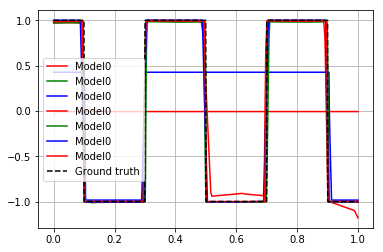

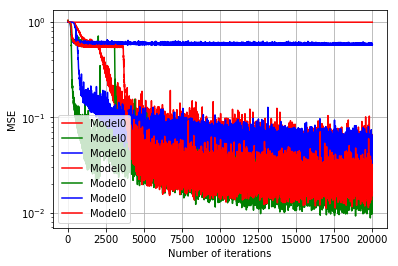

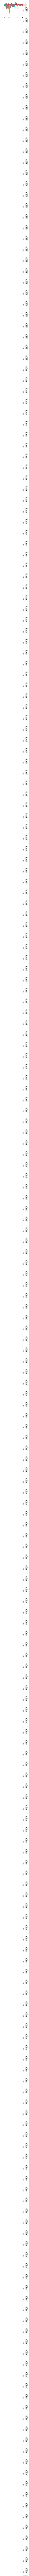

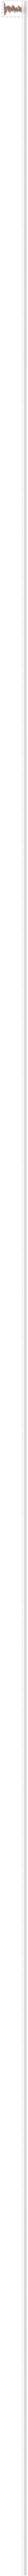

In [2]:
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

color = 'rgb'
num_func = 2
num_model = 0
for times in range(0,7):
    data_save_file_name = 'func' + str(num_func) + '_model' + str(num_model) + '_data' + str(times) + '.dat'
    loss_save_file_name = 'func' + str(num_func) + '_model' + str(num_model) + '_loss' + str(times) + '.dat'
    weight_save_file_name = 'func' + str(num_func) + '_model' + str(num_model) + '_weight' + str(times) + '.dat'
    bias_save_file_name = 'func' + str(num_func) + '_model' + str(num_model) + '_bias' + str(times) + '.dat'
    data_read = pd.read_csv(data_save_file_name)
    plt.figure(1), 
    plt.plot(data_read["x"], data_read["yhat"], color[times%3], label='Model'+str(num_model)), plt.grid(True)

    loss_read = pd.read_csv(loss_save_file_name)
    plt.figure(2), 
    plt.semilogy(loss_read, color[times%3], label='Model'+str(num_model))
    plt.xlabel('Number of iterations')
    plt.ylabel('MSE')
    plt.grid(True)
    
    weight_read = pd.read_csv(weight_save_file_name, header=None)
    plt.figure(3), plt.plot(weight_read[2:-1], label='Times'+str(times))
    
    bias_read = pd.read_csv(bias_save_file_name, header=None)
    plt.figure(4), plt.plot(bias_read[2:-1], label='Times'+str(times))

plt.figure(1), plt.plot(data_read["x"], data_read["y"], 'k--', label='Ground truth'), plt.grid(True)
plt.legend(loc=0)
plt.figure(2), plt.legend(loc=0)
plt.figure(3), plt.legend(loc=0)
plt.figure(4), plt.legend(loc=0)

/home/pixiym/miniconda3/envs/py3k/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


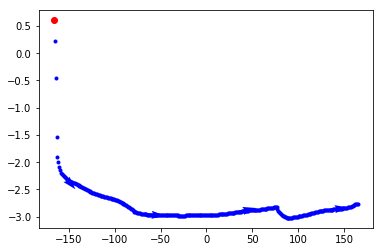

In [5]:
import numpy as np
import sys, os, csv, argparse
import pandas as pd
sys.path.append('..')
from sklearn.decomposition import PCA
from utility import *

pca = PCA(n_components=2)
num_model = 0
times = 0
samples_weight = np.array([])
for num_func in range(0,2):
    data_save_file_name = 'func' + str(num_func) + '_model' + str(num_model) + '_data' + str(times) + '.dat'
    loss_save_file_name = 'func' + str(num_func) + '_model' + str(num_model) + '_loss' + str(times) + '.dat'
    weight_save_file_name = 'func' + str(num_func) + '_model' + str(num_model) + '_weight' + str(times) + '.dat'
    bias_save_file_name = 'func' + str(num_func) + '_model' + str(num_model) + '_bias' + str(times) + '.dat'
    weight_read = pd.read_csv(weight_save_file_name, header=None)    
    bias_read = pd.read_csv(bias_save_file_name, header=None)
    if not samples_weight.size:
        samples_weight = weight_read
    samples_weight = np.hstack((samples_weight, weight_read))

pc1 = pca.fit_transform(np.transpose(samples_weight))
plt.figure,  plt.plot(pc1[0:333,0], pc1[0:333,1], 'b.')
plt.plot(pc1[0,0], pc1[0,1], 'ro')

ax = plt.axes()
ax.quiver(pc1[301,0], pc1[301,1], pc1[302,0]-pc1[301,0], pc1[302,1]-pc1[301,1], 
          angles='xy', scale_units='xy', color='b', width=0.008)
ax.quiver(pc1[201,0], pc1[201,1], pc1[202,0]-pc1[201,0], pc1[202,1]-pc1[201,1], 
          angles='xy', scale_units='xy', color='b', width=0.008)
ax.quiver(pc1[101,0], pc1[101,1], pc1[102,0]-pc1[101,0], pc1[102,1]-pc1[101,1], 
          angles='xy', scale_units='xy', color='b', width=0.008)
ax.quiver(pc1[10,0], pc1[10,1], pc1[11,0]-pc1[10,0], pc1[11,1]-pc1[10,1], 
          angles='xy', scale_units='xy', color='b', width=0.008)


#fig = plt.figure()
#axes = fig.add_subplot(111)
#arrowplot(axes, pc1[:,0], pc1[:,1], dspace=0.0, hl=0.1, hw=5, c='r' ) 
#plt.show()